# Eigenvectors and Eigenvalues

## Introduction and motivation

Eigenanalysis - that is, analysis of eigenvectors and eigenvalues - is a fundamental topic in both pure and applied math. We will learn about it in this class because no self-respecting linear algebra class can do without it, and because eigenanalysis provides helpful intuition and is an extremely useful tool in many concrete settings. For example, eigenanalysis

- is the basis of principle components analysis (PCA), which we will talk about next week. 
- can be used to predict the evolution of arbitrary linear dynamical systems, and to extract crucial information from nonlinear dynamical systems via a technique known as *linearization*. We will cover this topic later in the course. 
- provides a beautiful and powerful interpretation for Fourier analysis. 

## Basic linear algebra

We'll begin with the bare essentials. These are the facts you should know from this section:

:::{admonition} Key Takeaways
:class: important
1. For a matrix $A$, an eigenvector is a vector $v$ and an eigenvalue is a scalar (ie. number) $\lambda$ that together satisfy the equation $Av=\lambda v$. That is, when applying $A$, the vector $v$ only changes in length, unlike a general vector which may be whipped around in a random direction. 
2. A general $n\times n$ matrix has $n$ eigenvalues, when counted with multiplicity. These may be complex numbers. 
3. Not all $n\times n$ matrices have $n$ *eigenvectors*. However, a special class of matrices, called *normal matrices*, which includes *symmetric*, *antisymmetric*, and *rotation* matrices, is guaranteed to have a full set of $n$ eigenvectors. 
:::

Consider an arbitrary matrix $A$. If we select a vector $w$ at random and apply the matrix $A$, our expectation is that $A w$ will point in a random new direction. We then ask a natural question: are there any special vectors $v$ that, after applying $A$, the output $A v$ points in the same direction as the input $v$? Any such special vector is called an *eigenvector*. 

Get a feel for this by playing around with the graph below. Can you find special values for $v$ such that the new vector $Av$ points in the same direction as $v$?

In [1]:
from IPython.display import IFrame
IFrame('https://www.desmos.com/calculator/fhwvsgxyln?embed', width=700, height=350,style="border: 1px solid #ccc",frameborder=0)

:::{admonition} Definition
:class: note
An **eigenvector** of a matrix $A$ is a vector $v$ satisfying
```{math}
:label: my_label
Av = \lambda v
```
where $\lambda$ is an ordinary scalar. $\lambda$ is said to be the associated **eigenvalue**.

Let's illustrate this with a simple example:

:::{admonition} Exercise
:class: note
Confirm that the vector $v$ is an eigenvector of the matrix $A$ and determine the eigenvalue.
```{math}
v=\left(\begin{array}{c}
1\\
-1
\end{array}\right)\quad A=\left(\begin{array}{cc}
0 & 2\\
2 & 0
\end{array}\right)
```
:::{admonition} Solution
:class: seealso, dropdown

We simply multiply $A$ by $v$ using the rules of ordinary matrix multiplication:
```{math}
Av=\left(\begin{array}{cc}
0 & 2\\
2 & 0
\end{array}\right)\left(\begin{array}{c}
1\\
-1
\end{array}\right)=\left(\begin{array}{c}
0\cdot1+2\cdot\left(-1\right)\\
2\cdot1+0\cdot\left(-1\right)
\end{array}\right)=\left(\begin{array}{c}
-2\\
2
\end{array}\right)=-2v,
```
which shows that $v$ is an eigenvector of $A$ with eigenvalue $-2$. 
:::

The exercise above shows that some matrices have an eigenvalue/eigenvector. A natural question to ask is whether *all* matrices do. It turns out the answer is yes, with some qualifications: 

```{admonition} Theorem: $n\times n$ matrices have $n$ eigenvalues
Every $n\times n$ matrix $A$ has $n$ eigenvalues when counted with multiplicity. Even when the matrix $A$ is real, the eigenvalues may be complex numbers. 
```

````{admonition} Proof
:class: dropdown
Suppose $A$ is an arbitrary $n\times n$ matrix with complex components (which includes purely real components as a special case). Begin with the defining equation $Av =\lambda v$. Subtracting the right from both sides, we may write $(A-\lambda I)v = 0$, where $I$ is the $n\times n$ identity matrix. This states that the matrix $(A-\lambda I)$ sends $v$ to $0$, which implies that it is singular, which in turn implies that its determinant is $0$:
```{math}
\det(A-\lambda I)=0
```
We may take this as the definition of an eigenvalue $\lambda$ - ie. special values of $\lambda$ such that the determinant $\det(A-\lambda I)$ vanishes. This determinant is a degree $n$ polynomial in $\lambda$, and so by the fundamental theorem of algebra, there are $n$ complex eigenvalues when counted with multiplicity. 
````

This theorem suggests that the matrix in the exercise above should have a second eigenvalue besides $-2$. A bit of experimentation shows that this is exactly right. 

:::{admonition} Exercise
:class: note
Consider the second vector $w = \begin{pmatrix} 1 \\ 1 \end{pmatrix}.$ Show that $w$ is also an eigenvector of $A$.

:::{admonition} Solution
:class: seealso, dropdown

```{math}
Aw=\left(\begin{array}{cc}
0 & 2\\
2 & 0
\end{array}\right)\left(\begin{array}{c}
1\\
1
\end{array}\right)=\left(\begin{array}{c}
0\cdot1+2\cdot 1\\
2\cdot1+0\cdot 1
\end{array}\right)=\left(\begin{array}{c}
2\\
2
\end{array}\right)=2w,
```
Thus we've found a second eigenvector, $w$, whose associated eigenvalue is $2$. 
:::

The situation with *eigenvectors* is a bit more complex: an $n\times n$ matrix may fail to have $n$ eigenvectors, in which case the matrix is said to be *defective*.

There are, however, special classes of matrices which are guaranteed to have a complete set of eigenvectors. One such class is the *normal matrices*, which includes *symmetric*, *antisymmetric*, and *orthogonal (rotation)* matrices. These are very important and often come up in applications. 

:::{admonition} Theorem: Symmetric matrices have a complete set of eigenvectors
A symmetric matrix, ie. one satisfying $A^\top = A$, always has a complete set of $n$ eigenvectors $v_1,v_2,\ldots v_n$. Furthermore, these eigenvectors are orthogonal, so that $v_i\cdot v_j=0$ for distinct eigenvectors $i\neq j$. 
:::

:::{admonition} Proof
:class: dropdown
Let $A$ be a symmetric $n\times n$ matrix. We'll proceed by induction on the dimension $n$. The statement is obviously true for $n=1$, since a $1$-dimensional symmetric matrix is a scalar. Now assume the statement is proven for all $n\leq k$. Suppose $n=k+1$. Take any one of $A$'s eigenvalues $\lambda$. Since $\det\left(\lambda I-A\right)=0$, there must be at least one nonzero vector satisfying $Av=\lambda v$. Take any orthogonal basis including $v$ as one basis vector. This divides $A$ into two subspaces: the $1$-dimensional subspace spanned by $v$, and the $k$-dimensional subspace spanned by the remaining basis vectors. For any vector $w$ in the second subspace, we have $v^{\top}Aw=\left(Av\right)^{\top}w=\lambda v^{\top}w=0$ by orthogonality of the basis. Thus $A$ sends the entire $k$-dimensional subspace to itself, and $A$'s action in that space can be represented by a $k\times k$ matrix. By induction, this matrix has $k$ orthogonal eigenvectors, which yield k eigenvectors for $A$ in the $k$-dimensional space, which together with $v$ yield a $k+1$-dimensional set of orthogonal vectors, proving the statement. 
:::

:::{admonition} Exercise
:class: Note
The matrix $A$ that we have been working with so far is symmetric. We found $2$ distinct eigenvectors $v$ and $w$, which amount to a complete set, since $A$ is $2\times 2$. Based on the theorem we just covered, $v$ and $w$ should be orthogonal. Demonstrate that this is the case.
:::{admonition} Solution
:class: seealso, dropdown
Orthogonal vectors have a dot product of 0. Let's confirm this for $v$ and $w$:
```{math}
v\cdot w = -2\cdot 2+2\cdot 2=0
```
:::

## Determining eigenvalues and eigenvectors

Next we discuss how eigenvalues and eigenvectors are computed for a given matrix. We'll begin by discussing the problem from the linear algebraic point of view, which is essential for proving mathematical statements about eigenvalues/eigenvectors, as well as for designing algorithms. After, we'll illustrate how to easily compute eigenvalues/eigenvectors using python. 

### Theory

#### A simple example

We begin with a simple, concrete example that will help us guess the general recipe. Let's suppose we're given the matrix $A = \begin{pmatrix} 0 & 2 \\ 2 & 0 \end{pmatrix}$ from the examples above, and that we don't aready know the eigenvectors $v$ and $w$. All we know is that an eigenvector $w$ should satisfy $Aw=\lambda w$. Moving the left side to the right, we have
```{math}
Aw - \lambda w=\left(\begin{array}{cc}
0 & 2\\
2 & 0
\end{array}\right) w-\lambda w=0.
```
Since the identity matrix $I$ leaves every vector unchanged, there's no harm in putting an $I$ between $\lambda$ and $w$, leaving $Aw - \lambda I w = 0$. But now we can factor out the vector $w$ to the right, leaving
```{math}
(A - \lambda I) w=\left(\begin{array}{cc}
0 & 2\\
2 & 0
\end{array}\right) w-\left(\begin{array}{cc}
\lambda & 0\\
0 & \lambda
\end{array}\right) w=\left(\begin{array}{cc}
-\lambda & 2\\
2 & -\lambda
\end{array}\right) w=0,
```
which shows that the matrix $A-\lambda I=\left(\begin{array}{cc}
-\lambda & 2\\
2 & -\lambda
\end{array}\right)$ sends the vector $w$ to $0$. The only way this is possible is if the matrix $A-\lambda I$ is singular, ie. its determinant is $0$. So we compute the derivative and set it to $0$:
```{math}
\det(A-\lambda I)=\det\left(\begin{array}{cc}
-\lambda & 2\\
2 & -\lambda
\end{array}\right)=(-\lambda)(-\lambda)-2\cdot2=\lambda^2-4=0
```

```{sidebar} Insight 1
From $(A - \lambda I) w$ we concluded that $(A - \lambda I)$ must have a determinant of $0$, which allowed us to write an equation and then solve for the eigenvalues $\lambda$.
```
Moving the $4$ over and taking square roots, we find $\lambda =\pm 2$, which is promising, since these are the two eigenvalues we found before.

Now we want to determine the eigenvector associated to, say, the eigenvalue $+2$. Returning to $(A - \lambda I) w=0$, we'll set $\lambda=2$, and suppose the $x$- and $y$-components of the eigenvector $w$ are $x$ and $y$, respectively:
```{math}
\left(A-\lambda I\right)w=\left(\begin{array}{cc}
-2 & 2\\
2 & -2
\end{array}\right)\left(\begin{array}{c}
x\\
y
\end{array}\right)=\left(\begin{array}{c}
-2x+2y\\
2x-2y
\end{array}\right)=0
```

```{sidebar} Insight 2
Plugging in a value for $\lambda$ in $(A-\lambda I)w=0$ gives a linear system of equations for the components of the eigenvector $v$.
```
which gives us the system of equations
```{math}
-2x+2y&=0\\
2x-2y&=0
```
Multiplying the first equation by $-1$, we find that it is identical to the second equation, so the best we can do is solve one of them, yielding $x=y$, and say that the eigenvector is any vector where the $x$- and $y$-components are equal. We can check this by setting $w = \begin{pmatrix} x \\ x \end{pmatrix}$ — a generic vector with equal components.
```{math}
Aw=\left(\begin{array}{cc}
0 & 2\\
2 & 0
\end{array}\right)\left(\begin{array}{c}
x\\
x
\end{array}\right)=\left(\begin{array}{c}
0\cdot x+2\cdot x\\
2\cdot x+0\cdot x
\end{array}\right)=\left(\begin{array}{c}
2x\\
2x
\end{array}\right)=2w,
```
which confirms that any such vector is an eigenvector. What's going on here? Why are there infinitely many solutions? This is due to the simple fact that we can scale an eigenvector arbitrarily and obtain another eigenvector with the same eigenvalue. Concretely, if $Aw=\lambda w$, then the scaled vector $aw$ is still an eigenvector, since $A(aw)=aAw=a\lambda w=\lambda (aw)$, and so $av$ satisfies the same eigenvector equation. This freedom to scale $w$ is often used to scale $w$ to have length equal to $1$. Still, though, we can set $x=1$, and even though $w$'s length is then $\sqrt{2}$, we've still managed to find a perfectly good eigenvector associated to the eigenvalue $2$. Repeating this process after plugging in $\lambda=-2$, we easily find $A$'s second eigenvector $v$. 

#### The general recipe

Looking back at our strategy for the $2\times 2$ matrix $A$, we can now outline a general procedure for finding the eigenvalues of an arbitrary $n\times n$ matrix $M$. 

:::{admonition} The Eigenvalue Recipe
:class: important

1. Since an eigenvalue/eigenvector pair must satisfy $Mv=\lambda v$, we conclude that $(M-\lambda I)v=0$ for a nonzero vector $v$, and so $\det(M-\lambda I)=0$. Writing out the determinant explicitly yields a degree $n$ polynomial, called the *characteristic polynomial* of $M$. Solving for the roots of the characteristic polynomial yields the eigenvalues $\lambda$. 
2. We then substitute one of the eigenvalues for $\lambda$ in $(M-\lambda I)v=0$, yielding a linear system of equations for the eigenvector $v$. Solving, we obtain the components of $v$, up to an overall scaling factor, which can optionally be chosen so that $v$ has length $1$.

:::


### Python

Eigenvalues and eigenvectors can easily be computed in python using `np.linalg.eig`. We'll illustrate with our familiar matrix $A = \begin{pmatrix} 0 & 2 \\ 2 & 0 \end{pmatrix}$:

In [2]:
import numpy as np
A = np.array([[0,2],[2,0]])
E,V = np.linalg.eig(A)
print('eigenvalues:',E)
print('eigenvectors:')
print(V)

eigenvalues: [ 2. -2.]
eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Note that `np.linalg.eig` returns two things, the eigenvectors, which we've stored in `E`, and the eigenvectors, which go into the columns of the matrix `V`. If the eigenvectors `V` look different than you expected, recall that we're allowed to scale them by an arbitrary factor. Numpy scales them to have unit lenght. If we multiply them by $\sqrt{2},$ we find

In [3]:
print(np.sqrt(2)*V)

[[ 1. -1.]
 [ 1.  1.]]


which are exactly the eigenvectors $v$ and $w$ from above. 

Of course, we're not limited to $2\times 2$ matrices. We can easily compute eigenvalues and eigenvectors for larger matrices that would be next to impossible to treat by hand. Here's an example of a $1000\times 1000$ matrix. Let's time this while we're at it:

In [4]:
%%time 
M = np.random.randn(1000,1000)
M = (M+M.T)/np.sqrt(1000)
E,V = np.linalg.eig(M)

CPU times: user 3.37 s, sys: 94.6 ms, total: 3.46 s
Wall time: 482 ms


and now let's make a histogram of the eigenvalues

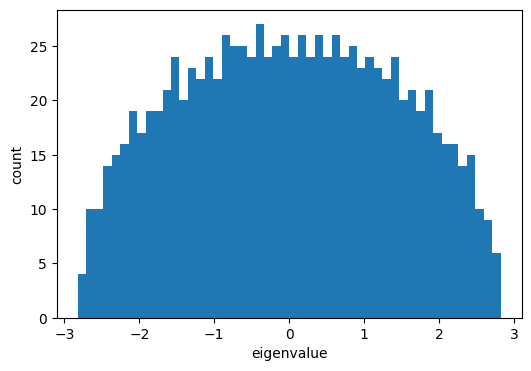

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(E,50)
plt.xlabel('eigenvalue')
plt.ylabel('count')
plt.show()

## Diagonalization

In this section we will explore the problem of finding a simple way to express what a given matrix does to a general vector. For this we'll encounter a powerful technique for decomposing a matrix known as *diagonalization*, or *eigendecomposition*. Here are the key takeaways:

:::{admonition} Key Takeaways
:class: important
1. A matrix acts most simply on its eigenvectors. For each eigenvalue/eigenvector pair $\lambda_i,v_i$, we can write $Av_i=\lambda_i v_i$. Collecting all eigenvectors into the columns of the matrix $V$, we can write $AV=VD$, where $D$ is a diagonal matrix whose $i^{th}$ entry is the $i^{th}$ eigenvalue $\lambda_i$.
2. If $A$ has a full set of $n$ linearly independent eigenvectors, then $V$ is invertible, and we can write $A=VDV^{-1}$. This is called the **eigendecomposition** of $A$. 
3. The eigendecomposition gives insight into the structure of $A$. It shows how if we change to an eigenvector basis, $A$ is diagonal. It makes computing powers of $A$ trivial, since $A^k=VD^kV^{-1}$.
4. A simple but powerful application (that we will study in more detail later on), is to predict the stability of a linear dynamical system. 
:::

### Derivation

Eigendecomposition is based on the idea that matrices behave most simply when viewed in terms of their eigenvectors. Let's begin by drawing the eigenvector equation for an eigenvector/eigenvalue pair $\lambda_i,v_i$ as follows:

```{image} diag1.png
:alt: eigenvector equation
:width: 250px
:align: center
```

This is true for each eigenvector, one at a time. You should check that both sides of this equation are $n\times 1$-dimensional.

We can actually collect all of these vector equations into one big $n\times n$ matrix equation as follows:

```{image} diag2.png
:alt: eigenvector equation
:width: 502px
:align: center
```

That is, we collect the eigenvectors into the columns of a matrix $V$, and we place the eigenvalues along the diagonal of a (diagonal!) matrix $D$. 

If $A$ has a full set of linearly independent eigenvectors - which is the case, for example, if $A$ is symmetric - then the eigenvector matrix $V$ has linearly independent columns and is therefore invertible. We can right-multiply our equation by $V^{-1}$, leaving 

```{math}
A=VDV^{-1}
```
which is the *diagonalization*, or *eigendecomposition* of $A$. 

:::{admonition} Exercise
:class: Note
Consider the matrix $A = \begin{pmatrix} 0 & 2 \\ 2 & 0 \end{pmatrix}$ — the same matrix we were working with before. We've already determined eigenvalues and eigenvectors. Use those quantities to find $V$ and $D$ and diagonalize $A$. (You can use a tool like NumPy to find the inverse of $V$). Then, prove that the diagonalization is equal to $A.$

:::{admonition} Solution
:class: seealso, dropdown
The eigenvectors and corresponding eigenvalues of $A$ are $2,-2$ and $\begin{pmatrix} 1\\ 1 \end{pmatrix}, \begin{pmatrix} 1\\ -1 \end{pmatrix}$, respectively. Arranging the eigenvalues along the diagonal entries of $D$, and collecting the two eigenvectors together to make $V$, we have
```{math}
D=\left(\begin{array}{cc}
2 & 0\\
0 & -2
\end{array}\right)\quad V=\left(\begin{array}{cc}
1 & 1\\
1 & -1
\end{array}\right)
```
Now we can compute $VDV^{-1}$:
```{math}
VDV^{-1}=\left(\begin{array}{cc}
1 & 1\\
1 & -1
\end{array}\right)\left(\begin{array}{cc}
2 & 0\\
0 & -2
\end{array}\right)\left(\begin{array}{cc}
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & -\frac{1}{2}
\end{array}\right)=\left(\begin{array}{cc}
0 & 2\\
2 & 0
\end{array}\right)=A
```
as claimed.
:::

Let's take a moment to consider what the equation $A=VDV^{-1}$ means. Suppose we have an arbitrary vector. Since the eigenvectors $\textbf{v}_1, \dots, \textbf{v}_n$ of $A$ are orthogonal, we can express any $n$-dimensional vector as a combination of the eigenvectors, i.e., $c_1\textbf{v}_1 + \dots + c_n\textbf{v}_n$ for some scalars $c_1, \dots, c_n.$ Equivalently, we could express our vector as $V\textbf{c}$ where $\textbf{c}$ is a column vector of those coefficients. Then

```{math}
AV\textbf{c}=VDV^{-1}V\textbf{c}=V(D\textbf{c}),
```
so $V\textbf{c}$ has turned into $V(D\textbf{c})$, which says that the coefficients of the eigenvectors, $\textbf{c}$, simply transform to $D\textbf{c}$. This is exactly what *should* happen, since the diagonal matrix $D$ scales each eigenvector by the corresponding eigenvalue. 

Stated another way, if we use the standard basis, the matrix components are found in $A$. Vectors transform as $\textbf{x}\to A\textbf{x}$. If, on the other hand, we use a basis of eigenvectors, the matrix components are found in $D$, and vectors transform as $\textbf{c}\to D\textbf{c}$. The diagonalization $A=VDV^{-1}$ simply expresses the *change of basis formula* that takes us to a very special basis: the eigenbasis. The advantage of being in this new basis is that we get the diagonal matrix $D$, which is extremely easy to understand and compute with. 

### Matrix powers
A very important use of the eigendecomposition, and one that we'll talk about more later in the class, is for taking powers of matrices. Suppose we want to compute the ${10}^{th}$ power of a matrix $A$. Our first instinct might be to write out the matrix $10$ times and successively multiply:

```{math}
A^{10} = A\cdot A\cdot A\cdot A\cdot A\cdot A\cdot A\cdot A\cdot A\cdot A
```
This is a very tedious approach! Even a single $2\times 2$ matrix multiplication takes effort. In real world problems, we often deal with much larger matrices and much larger powers. So we need a new strategy. 

Remember the adage that "matrices behave most simply when viewed in terms of their eigenvectors". Enter the eigendecomposition. 

:::{admonition} Exercise
:class: note
Substitute $A$'s eigendecomposition into the matrix power $A^2$ and simplify. What happens?
:::{admonition} Solution
:class: seealso, dropdown
\begin{align*}
A^2 &= AA \\
&= VDV^{-1}VDV^{-1}\\
&= VDIDV^{-1}\\
&= VD^2V^{-1}
\end{align*}
:::
In general, we find that when we raise $A=VDV^{-1}$ to a power, the inner $V$ and $V^{-1}$ matrices cancel, leaving only 
```{math}
A^k=VD^kV^{-1}.
```
This is a huge simplification: raising $A$ to a power directly can be very costly, but using the eigendecomposition we've reduced this to the problem of raising a *diagonal* matrix to a power, which is conceptually and practically very easy - just raise each entry to that power:

```{math}
D^{k}=\left(\begin{array}{ccc}
\lambda_{1}^{k}\\
 & \lambda_{2}^{k}\\
 &  & \ddots
\end{array}\right)
```
It's easier for you, and it's easier for the computer. Here we'll raise our favorite matrix, $A = \begin{pmatrix} 0 & 2 \\ 2 & 0 \end{pmatrix}$ to the ${1000}^{th}$ power, first using the direct approach, successively multiply by $A$:

In [6]:
A = np.array([[0,2],[2,0]])
p = 1000

In [7]:
%%timeit
Apow = np.eye(A.shape[0])
for i in range(p):
    Apow = A@Apow

2.01 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


and now again using the eigendecomposition:

In [8]:
%%timeit
E = np.array([2,-2])
V = np.array([[1,1],[1,-1]])
Apow = V@np.diag(E**p)@np.linalg.inv(V)

15.7 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


For large powers like this, the eigendecomposition can be orders of magnitude faster!

Now only does the eigendecomposition ease compution, it also can give us important insight into the structure of a matrix. This is very useful, for example, in the study of dynamical systems - which we'll start to see in the next section, and discuss further on in the course. 

### Demonstration: discrete linear dynamics

Consider a *discrete linear dynamical system*. That is, we have a system represented by a vector $x$ that evolves in discrete steps over time, where at each step, the update rule is

:::{math}
:label: lds
x_{n+1} = Ax_n
:::

If we assume that at time $0$ the system starts in state $x_0$, and we apply the update rule in {eq}`lds`, we can see that the state at any given time is just $x_n=A^n x_0$.

Using the eigendecomposition to express the matrix power, we have $x_n=VD^nV^{-1}x_0$. At the very least, we have a convenient way to predict the state of the system at any time in the future. 

:::{admonition} Example: Fibonacci Numbers
:class: note
Here we use eigendecomposition to derive a simple formula for the Fibonacci sequence. This sequence's first two terms are $1,1$, and from then on the next term is always the sum of the previous two terms. The first few terms are 
```{math}
1,1,2,3,5,8,13,21,\cdots
```
Concretely, $f_{n}=1$ for $n=1$ or $n=2$, and thereafter $f_{n}=f_{n-1}+f_{n-2}$. We can combine this recurrence with the trivial equation $f_{n-1}=f_{n-1}$ into the following system of equations:
```{math}
:label: fibb
\left(\begin{array}{c}
f_{n}\\
f_{n-1}
\end{array}\right)	=\left(\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right)\left(\begin{array}{c}
f_{n-1}\\
f_{n-2}
\end{array}\right),
```

for $n>2$, along with the initial value $\left(\begin{array}{c}
f_{2}\\
f_{1}
\end{array}\right)=\left(\begin{array}{c}
1\\
1
\end{array}\right)$. So defining a vector state $x_{n}=\left(\begin{array}{c}
f_{n}\\
f_{n-1}
\end{array}\right)$ that holds two fibonacci numbers at a time, and writing {eq}`fibb` in terms of $x_{n}$, we have 
```{math}
x_{n}=\left(\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right)x_{n-1},
```
ie. to move $x$ forward one step in time, we simply multiply by a $2\times 2$ matrix! We've thus expressed the fibinacci numbers as a $2$-dimensional discrete linear dynamical system. To get to $x_{n}$ from $x_{2}$, we simply step forward by $n-2$ applications of the system's matrix:
```{math}
x_{n}=\left(\begin{array}{cc}
1 & 1\\
1 & 0
\end{array}\right)^{n-2}x_{2}.
```
We'll compute the power using eigendecomposition. For this we'll need the matrix's eigenvalues and eigenvectors. Write $F$ for this matrix. We solve for the eigenvalues by setting the characteristic polynomial to $0$:
```{math}
0=\det\left(\lambda I-F\right)=\left(\lambda-1\right)\lambda-1,
```
which has solutions
```{math}
\lambda_{\pm}=\frac{1\pm\sqrt{5}}{2}.
```
Next to find $v_{+}$, the eigenvector associated to the eigenvalue $\lambda_{+}$, we need to solve the system of equations $\left(F-\lambda_{+}I\right)v_{+}=0$, which reads
```{math}
\left(\begin{array}{cc}
\frac{1-\sqrt{5}}{2} & 1\\
1 & \frac{-1-\sqrt{5}}{2}
\end{array}\right)\left(\begin{array}{c}
x\\
y
\end{array}\right)=0,
```
where $x,y$ are the components of $v_{+}$. As before, the system is singular (because of the freedom to scale any eigenvector), so we lose nothing by considering only the first equation, which yields $y=-\lambda_{-}x$. We are free to choose, say, $x=1$. Repeating the procedure for the other eigenvector, we find $v_{-}$, finally giving
```{math}
\lambda_{+},\lambda_{-}\quad\quad\left(\begin{array}{c}
1\\
-\lambda_{-}
\end{array}\right),\left(\begin{array}{c}
1\\
-\lambda_{+}
\end{array}\right),
```
for the eigenvalues and eigenvectors. Collecting the eigenvalues into the diagonal matrix $D$ and the eigenvectors into the matrix $V$, we can now compute powers of $F$ via the diagonalization $F^{k}=VD^{k}V^{-1}$:
```{math}
F^{n-2}=\left(\begin{array}{cc}
1 & 1\\
-\lambda_{-} & -\lambda_{+}
\end{array}\right)\left(\begin{array}{cc}
\lambda_{+}^{n-2} & 0\\
0 & \lambda_{-}^{n-2}
\end{array}\right)\left(\begin{array}{cc}
1 & 1\\
-\lambda_{-} & -\lambda_{+}
\end{array}\right)^{-1}.
```
We then multiply this by $x_{2}$ to move the state forward to $x_{n}$, extract the first component of $x_{n}$, which is $f_{n}$ (the second component being $f_{n-1}$), and simplify, giving
```{math}
f_{n}=\frac{\lambda_{+}^{n}-\lambda_{-}^{n}}{\sqrt{5}}=\frac{\left(\frac{1+\sqrt{5}}{2}\right)^{n}-\left(\frac{1-\sqrt{5}}{2}\right)^{n}}{\sqrt{5}}.
```
This is known as [Binet's formula](https://en.wikipedia.org/wiki/Fibonacci_sequence#Binet's_formula). The first few terms are $1,1,2,3,\ldots$ as expected. If you ever wondered what the ${100}^{th}$ fibonacci number is, it's $354224848179261915075$. 
 
:::